In [42]:
#task 1 : 1.	Data Cleaning and Preparation

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Loading the dataset into a DataFrame
import pandas as pd
import numpy as np
df =  pd.read_csv("Cardiotocographic.csv")

#Handling missing values appropriately 
print(df.isnull().sum())
df.dropna(inplace=True)
print("After handling missing values:")
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64
After handling missing values:
LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [32]:
#We treat any record whose NSP is not exactly 1, 2, or 3 as an outlier and remove it

# Examine NSP (fetal state) values
print("Unique NSP values:", df['NSP'].unique()[:10])
print(df['NSP'].value_counts().head())

df = df[df['NSP'].isin([1.0, 2.0, 3.0])].reset_index(drop=True)
df['NSP'] = df['NSP'].astype(int)  # ensure integer class
print(f"After cleaning NSP: {df.shape}, NSP value counts:\n{df['NSP'].value_counts()}")



Unique NSP values: [ 2.          1.          3.         -1.025988    1.01084882  0.99671416
  3.00453507  0.99775653  5.          1.01334917]
NSP
 1.0    1546
 2.0     280
 3.0     164
-1.0       5
 5.0       4
Name: count, dtype: int64
After cleaning NSP: (1990, 14), NSP value counts:
NSP
1    1546
2     280
3     164
Name: count, dtype: int64


In [49]:
# Check for negative or invalid values in numeric features and removing the values
neg_cols = ['AC','DL','DS','DP','UC','FM','ALTV','MLTV','Width','ASTV','MSTV','Tendency']
for col in neg_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count:
        print(f"{col}: {neg_count} negative values , removing them.")
        df = df[df[col] >= 0]
df = df.reset_index(drop=True)
print(f"After removing negative outliers: {df.shape}")


TypeError: 'NoneType' object is not subscriptable

In [47]:
df.shape

(2105, 14)

In [46]:
#task 2 :	Statistical Summary:

# Calculate and print the statistical summary
print(df.describe().T[['mean','50%','std','25%','75%']].round(3))


# Calculate the interquartile range (IQR) for each numerical column
print("\nInterquartile Range (IQR):")
print(df.quantile(0.75) - df.quantile(0.25))

#detecting outliers
outlierss = []
def detect_outliers_iqr(df):
    outlier_dict = {}
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlierss.append(outliers)
        outlier_dict[col] = outliers.shape[0]
        print(f"{col}: {outliers.shape[0]} outliers detected")

    return outlier_dict

# Run the function
outliers_found = detect_outliers_iqr(df)

df.shape
#Key interesting findings :-
#LB column is symmetrical shape data (mean = median = mode)
#Most of the columns are Highly skewed( median < mean)
#most of the columns have high variability because of Std > Mean
#All columns contains outliers(extreme values) but FM, DP, DS, DL, ALTV contains more extreme values.

             mean      50%     std      25%      75%
LB        133.344  133.000  11.270  126.000  140.000
AC          0.003    0.002   0.004    0.000    0.006
FM          0.010    0.000   0.068    0.000    0.003
UC          0.004    0.004   0.003    0.002    0.007
DL          0.002    0.000   0.003    0.000    0.003
DS          0.000    0.000   0.000    0.000    0.000
DP          0.000    0.000   0.001    0.000    0.000
ASTV       46.997   49.000  18.848   32.000   61.000
MSTV        1.361    1.200   1.173    0.700    1.700
ALTV       10.354    0.000  21.282    0.000   11.000
MLTV        8.285    7.400   7.773    4.600   10.900
Width      70.429   67.000  42.932   37.000  100.000
Tendency    0.316    0.000   0.646    0.000    1.000
NSP         1.305    1.000   0.645    1.000    1.000

Interquartile Range (IQR):
LB          14.000000
AC           0.005650
FM           0.002554
UC           0.004698
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
M

(2105, 14)

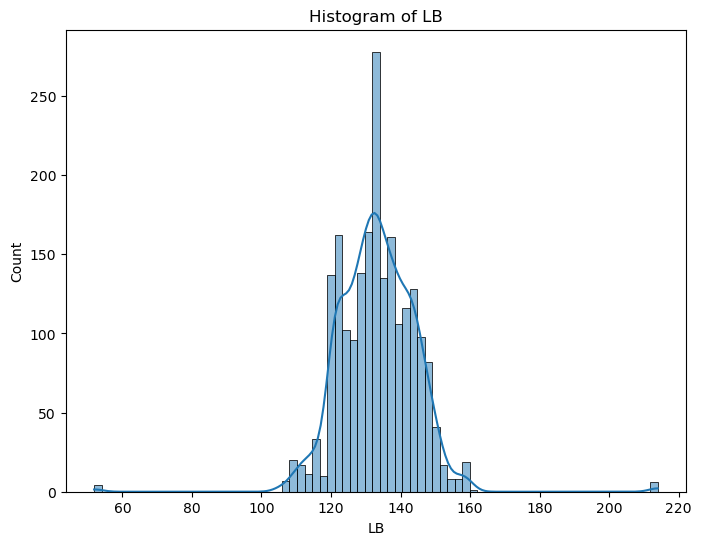

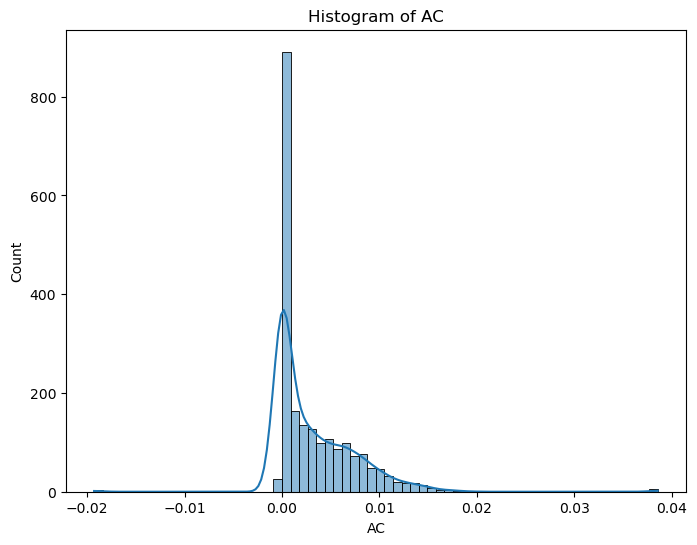

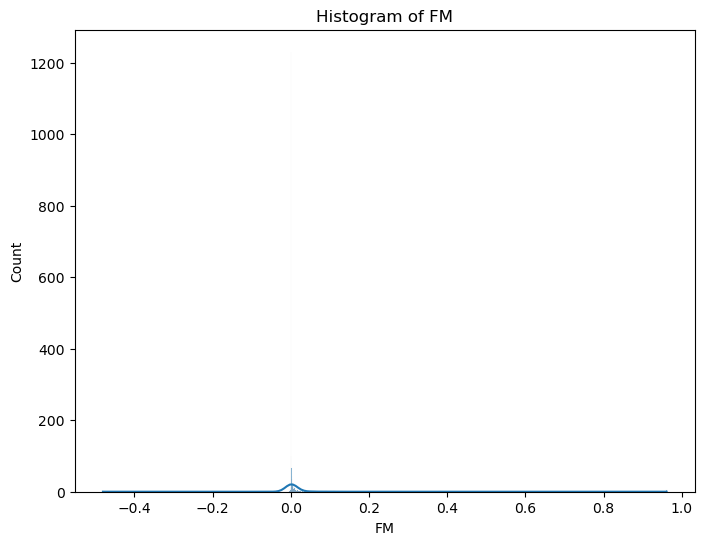

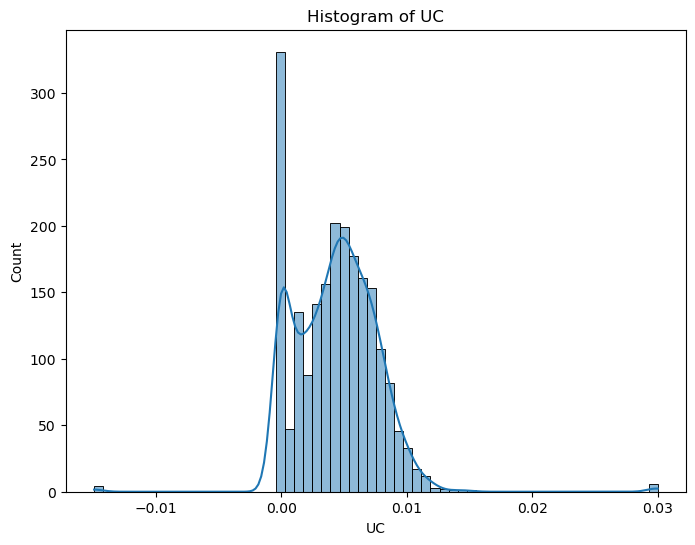

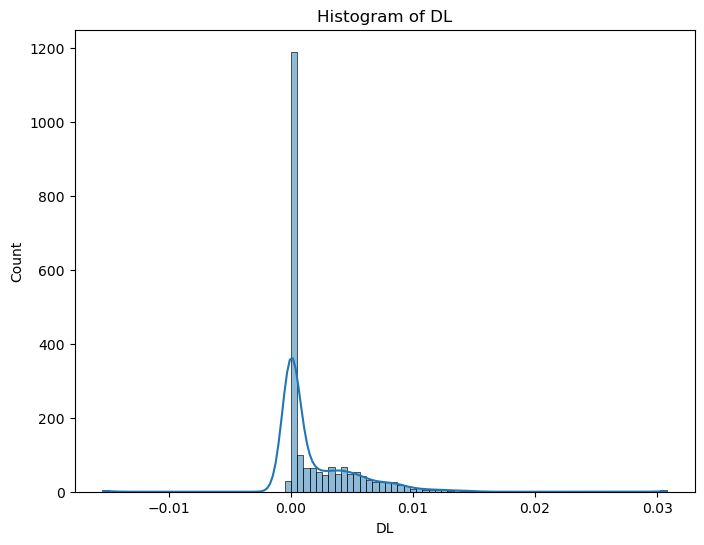

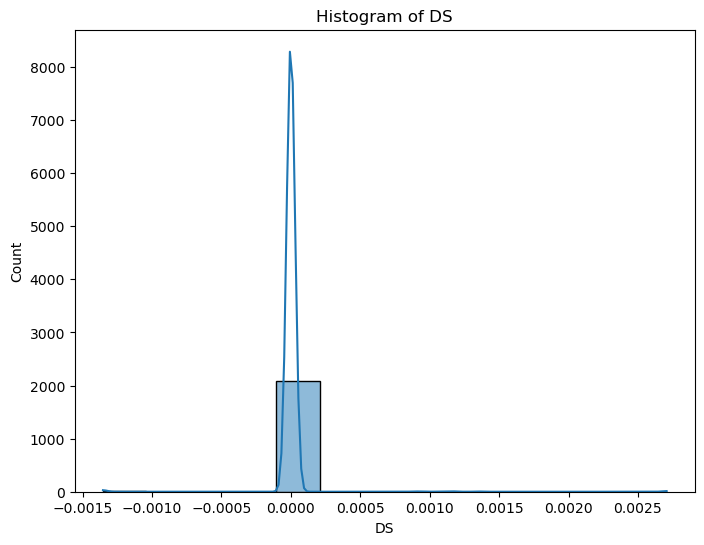

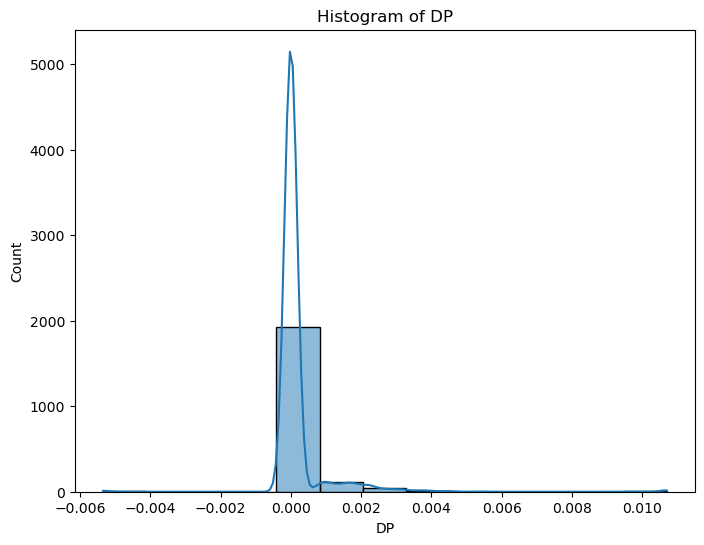

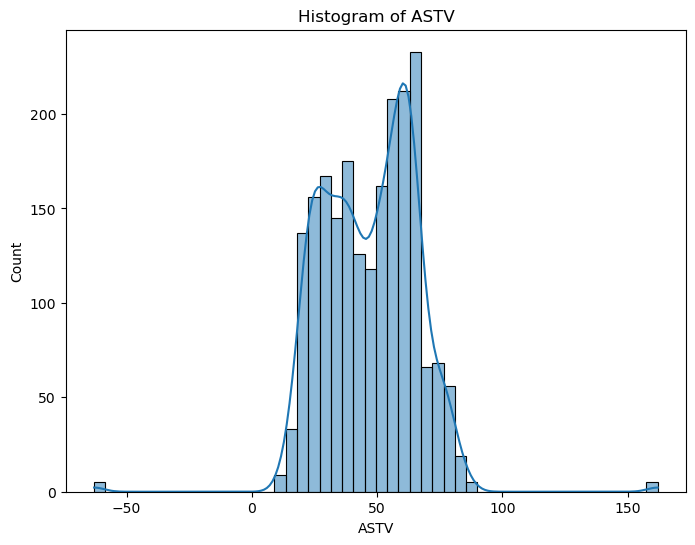

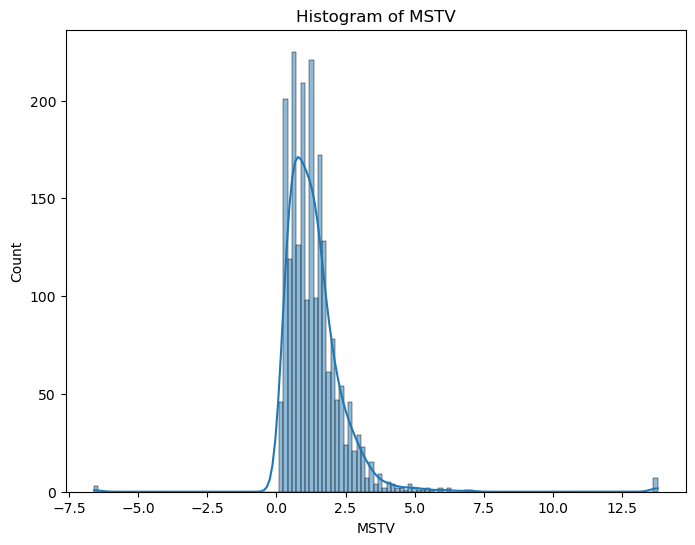

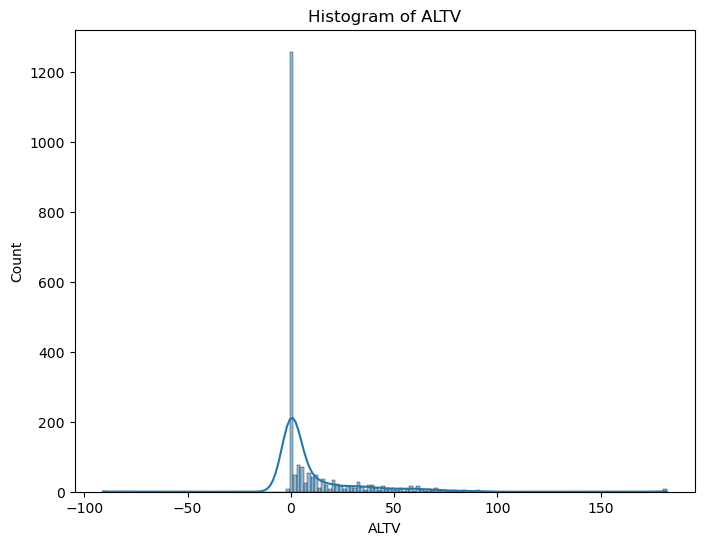

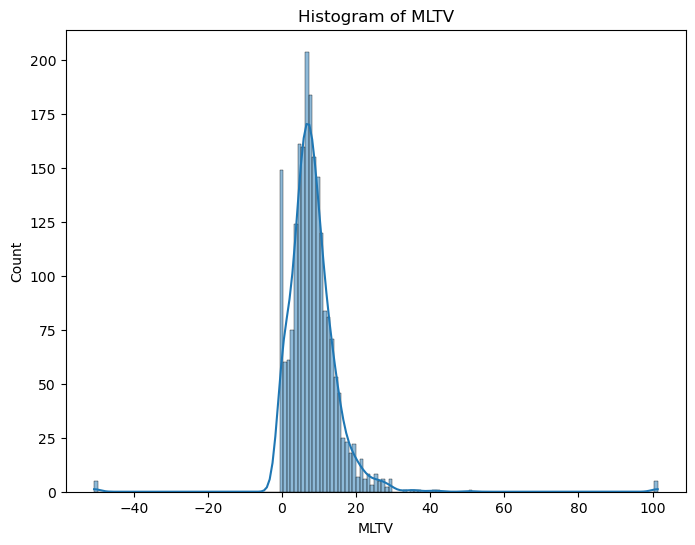

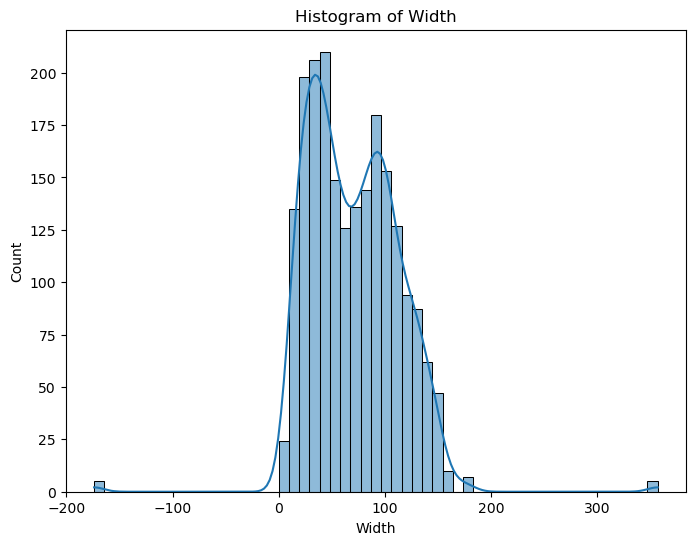

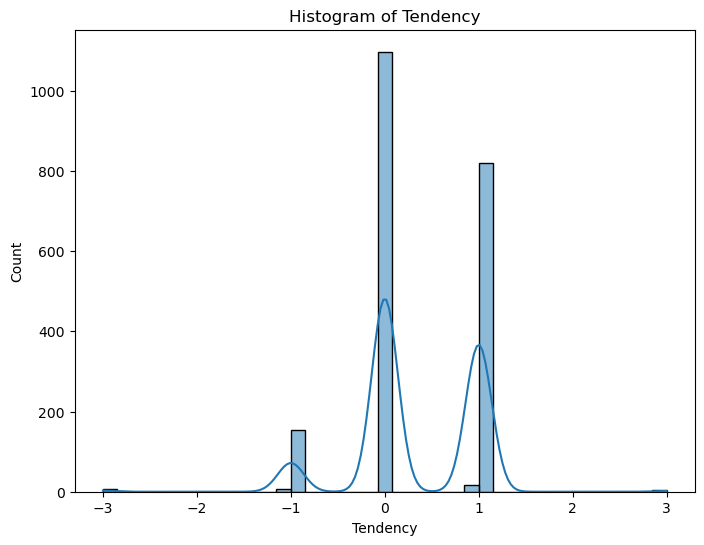

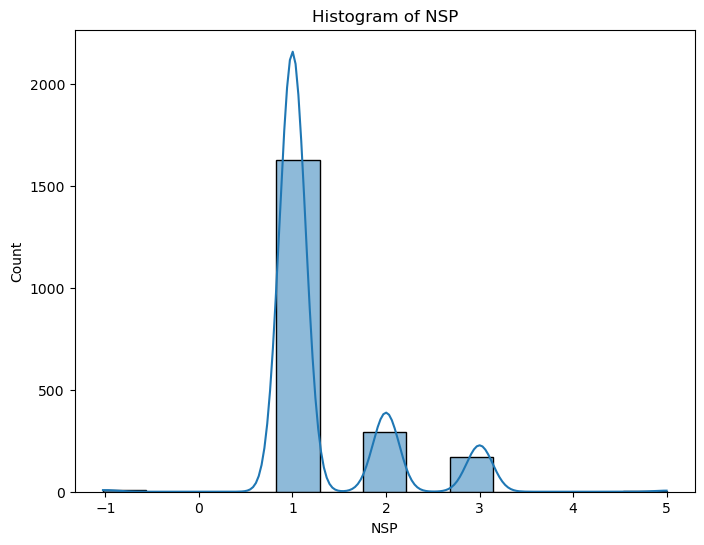

In [21]:
#3.	Data Visualization:

#Histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of each column using histograms
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()




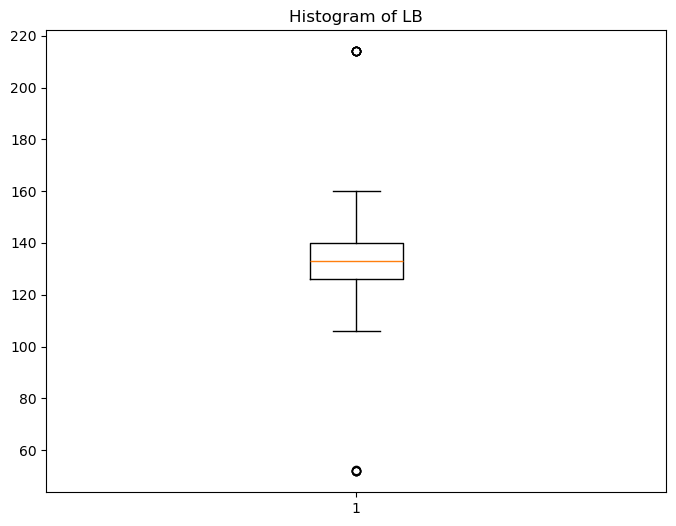

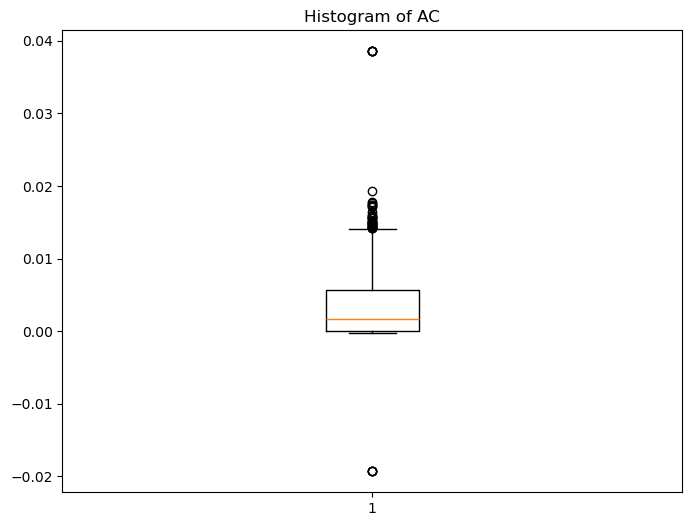

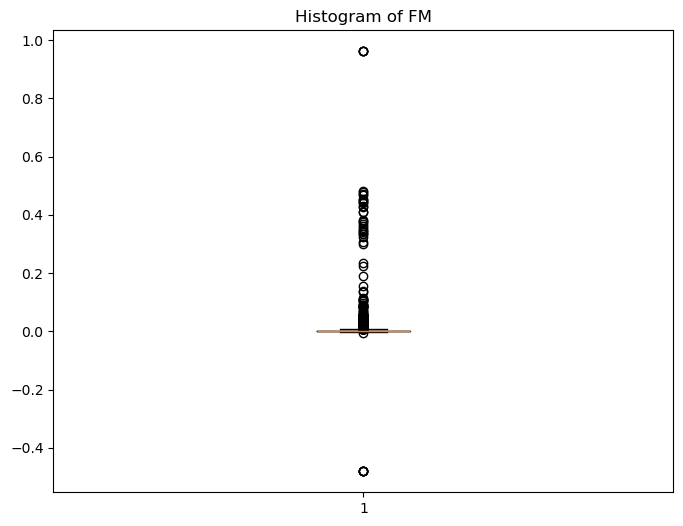

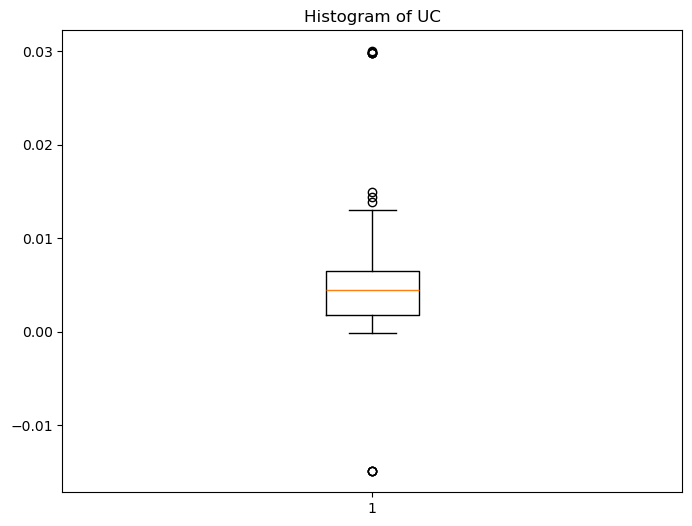

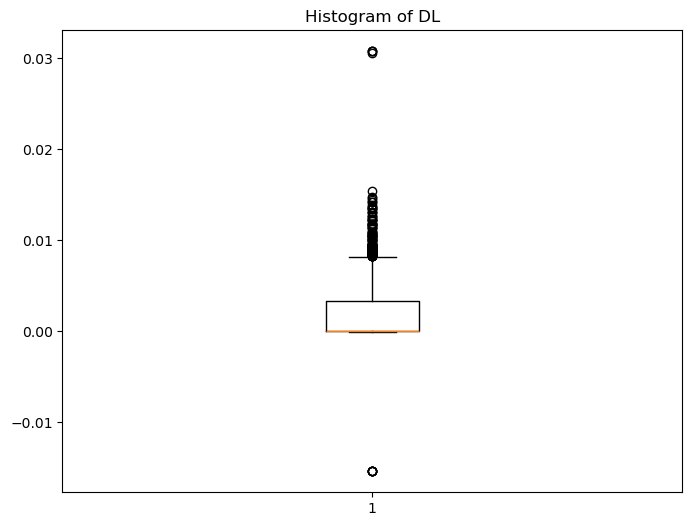

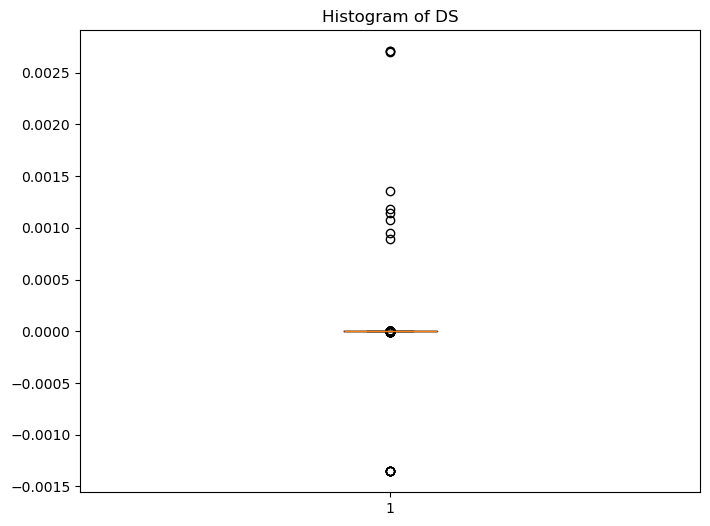

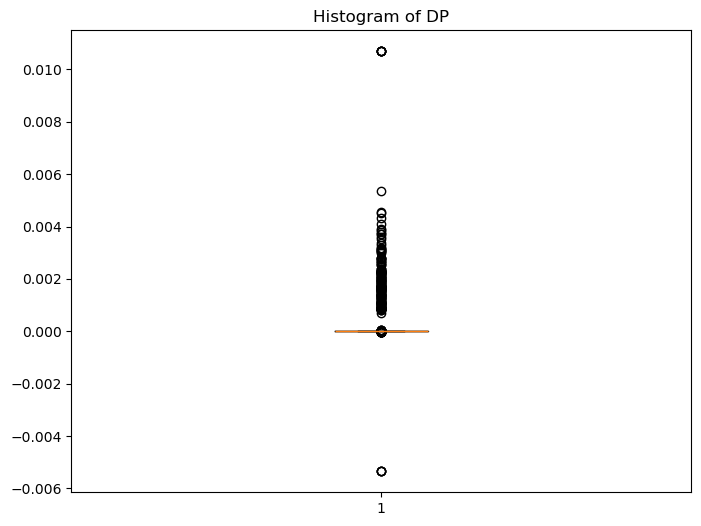

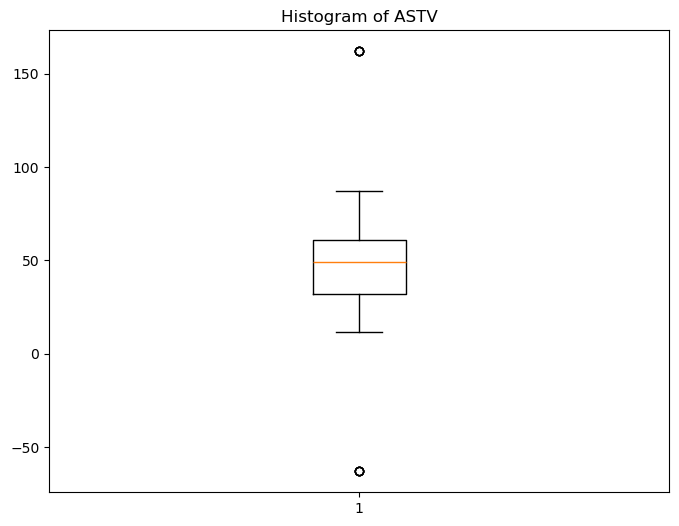

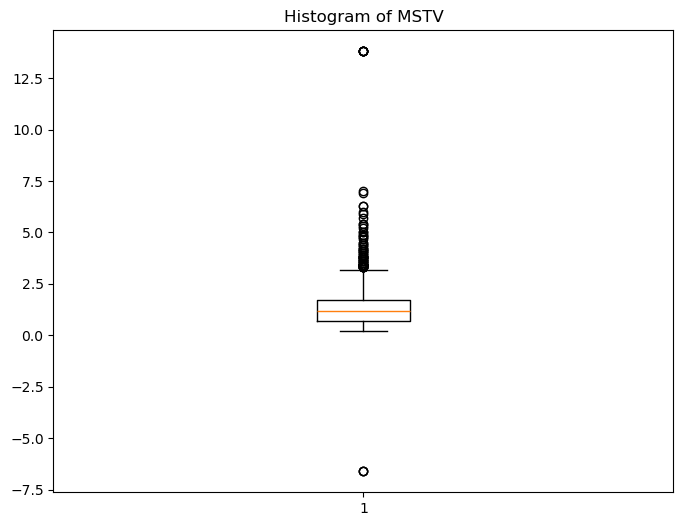

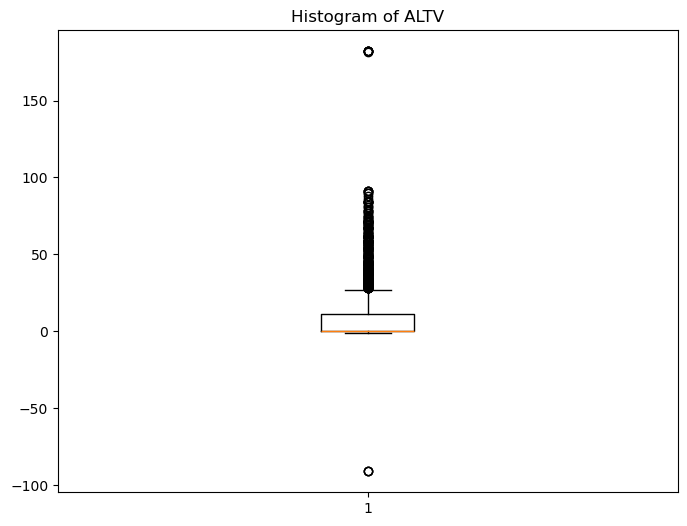

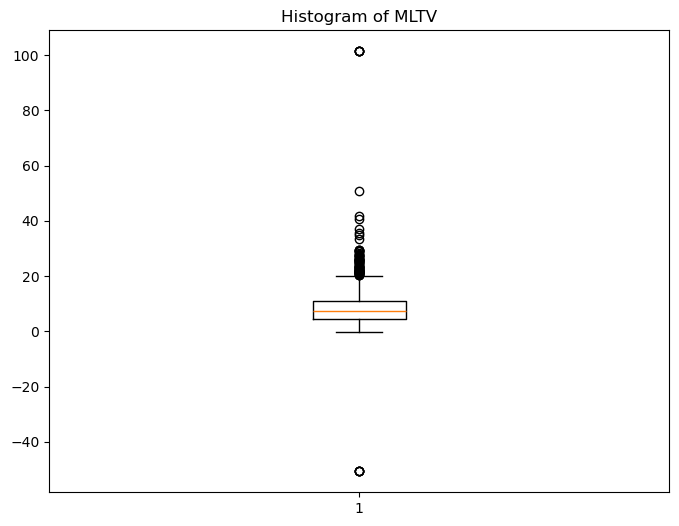

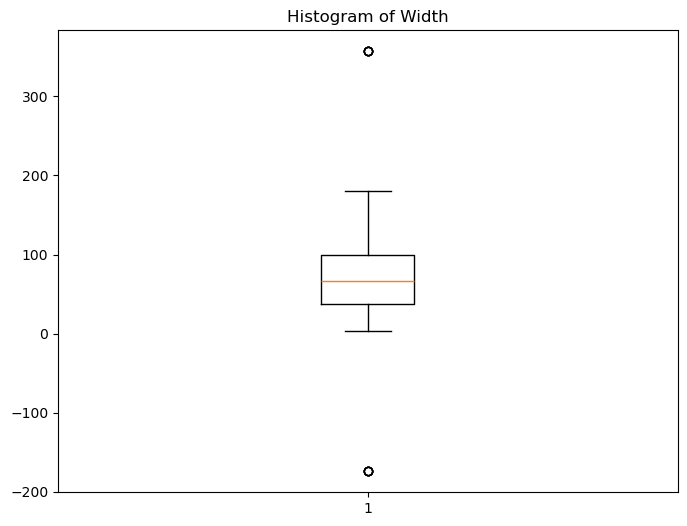

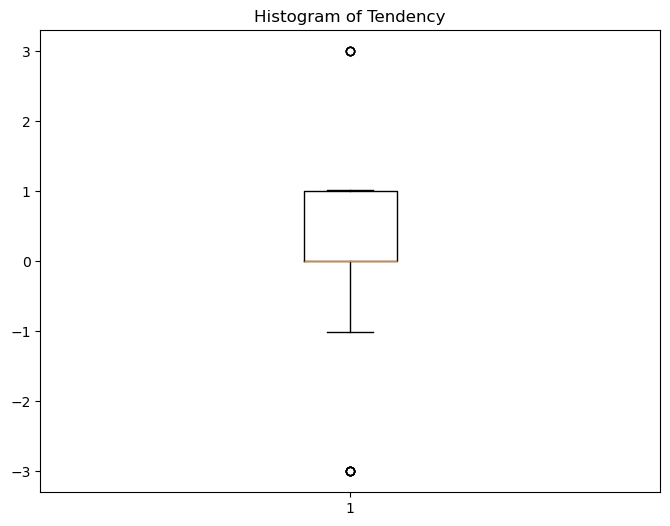

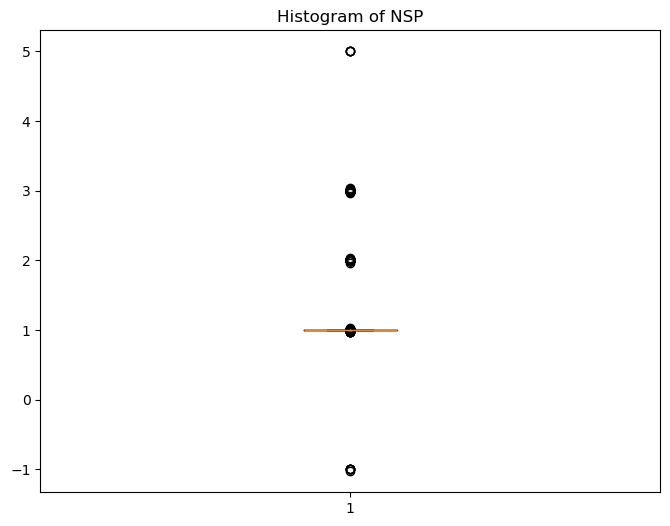

In [56]:
#box plot for all numerical numberas



# Plot boxplot for all numerical columns
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[col])
    plt.title(f"Histogram of {col}")
    plt.show()

In [52]:
#No barplot because there are no categorical variables

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df_no_outliers.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

NameError: name 'df_no_outliers' is not defined

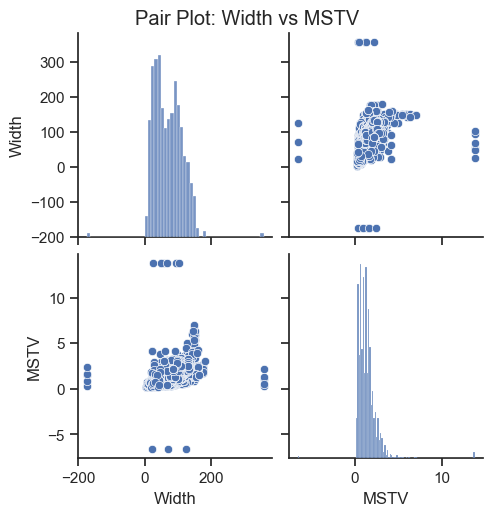

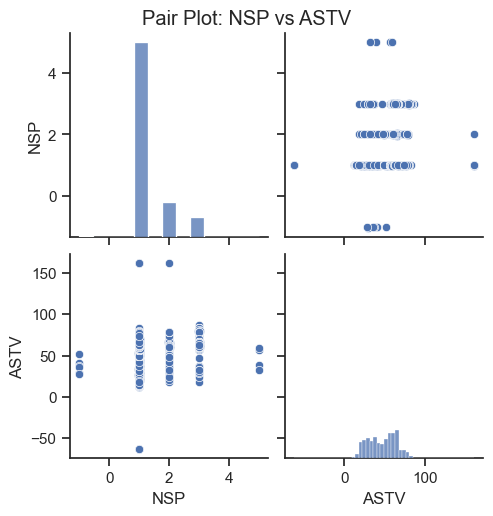

In [27]:
# Width and MSTV pair plot
#NSP and ASTV pair plot 

# Set seaborn style
sns.set(style="ticks")

# Plot 1: Pairplot between 'Width' and 'MSTV'
sns.pairplot(df[['Width', 'MSTV']])
plt.suptitle('Pair Plot: Width vs MSTV', y=1.02)
plt.show()

# Plot 2: Pairplot between 'NSP' and 'ASTV'
sns.pairplot(df[['NSP', 'ASTV']])
plt.suptitle('Pair Plot: NSP vs ASTV', y=1.02)
plt.show()